In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

23/05/16 09:11:24 WARN Utils: Your hostname, pclab028 resolves to a loopback address: 127.0.1.1; using 147.96.132.245 instead (on interface eno1)
23/05/16 09:11:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/16 09:11:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 7.1 MB/s eta 0:00:00m eta 0:00:01


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data_path = "datos/sample_10e3.json"

In [7]:
df = spark.read.json(data_path)

In [ ]:
df.show()

In [9]:
df.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [7]:
#1 Contar cada tipo
df.groupBy('user_type').count().show()

+---------+-----+
|user_type|count|
+---------+-----+
|        1|  954|
|        3|   36|
|        2|   10|
+---------+-----+



In [9]:
#1 Contar cada tipo
df.groupBy('ageRange').count().show()

+--------+-----+
|ageRange|count|
+--------+-----+
|       0|  491|
|       6|    5|
|       5|  131|
|       1|   19|
|       3|   75|
|       2|   12|
|       4|  267|
+--------+-----+



In [10]:
#1 Contar cada tipo
df.groupBy('idplug_base').count().show()

+-----------+-----+
|idplug_base|count|
+-----------+-----+
|         26|    9|
|         19|   26|
|         22|   38|
|          7|   45|
|         25|    6|
|          6|   33|
|          9|   49|
|         27|    5|
|         17|   37|
|          5|   50|
|          1|   49|
|         10|   31|
|          3|   54|
|         12|   39|
|          8|   44|
|         11|   39|
|          2|   64|
|          4|   49|
|         13|   27|
|         18|   29|
+-----------+-----+
only showing top 20 rows



# Pruebas de edad vs cuánto tiempo van en bici

 - Para poder hacer los gráficos necesitamos pasar 1º el dataframe al pandas y luego ya hacerle el plot. obviamente esto lo podemos hacer con pocos datos de prueba (luego no podremos). Pero nos sirve para tener una idea de cómo se comportan los datos.
 
 - Función clave: groupBy('columna que queramos'), luego podremos hacer sumas, medias, conteos, etc respecto a otras.

In [103]:
df2 = df.toPandas()

<AxesSubplot:xlabel='ageRange', ylabel='travel_time'>

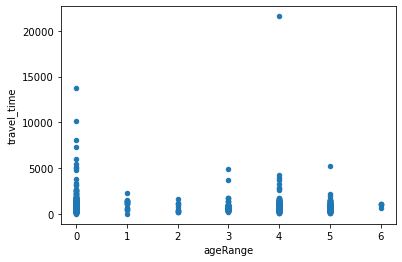

In [104]:
df2.plot.scatter(x="ageRange", y="travel_time")

In [105]:
#1 Contar cada tipo
df3 = df.gdf.count()roupBy('ageRange').sum('travel_time')

In [106]:
df3.show()

+--------+----------------+
|ageRange|sum(travel_time)|
+--------+----------------+
|       0|          465023|
|       6|            4914|
|       5|          103866|
|       1|           20765|
|       3|           62021|
|       2|            8102|
|       4|          239544|
+--------+----------------+



In [107]:
df3 = df3.orderBy('ageRange')

In [108]:
df3.columns

['ageRange', 'sum(travel_time)']

In [109]:
df3.show()

+--------+----------------+
|ageRange|sum(travel_time)|
+--------+----------------+
|       0|          465023|
|       1|           20765|
|       2|            8102|
|       3|           62021|
|       4|          239544|
|       5|          103866|
|       6|            4914|
+--------+----------------+



<AxesSubplot:ylabel='sum(travel_time)'>

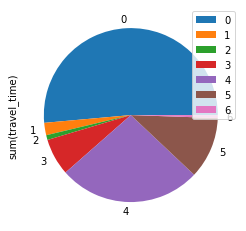

In [110]:
df3.toPandas().plot.pie(y='sum(travel_time)')

<AxesSubplot:xlabel='ageRange'>

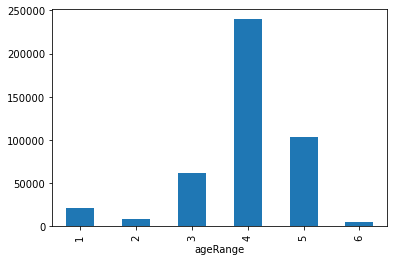

In [113]:
# quitamos la fila 0 que es la que tiene rangos de edades desconocidas, por eso no nos interesa
df3.toPandas().drop(0).plot.bar(x='ageRange', y='sum(travel_time)', legend=False)